<a href="https://colab.research.google.com/github/whdigrace/kfq_ML_2023/blob/main/%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC_%EC%86%90%EA%B8%80%EC%94%A8_%EC%98%81%EC%97%AD_%EB%A7%88%ED%82%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
from google.colab.patches import cv2_imshow

In [5]:
path='/content/drive/MyDrive/number.png'

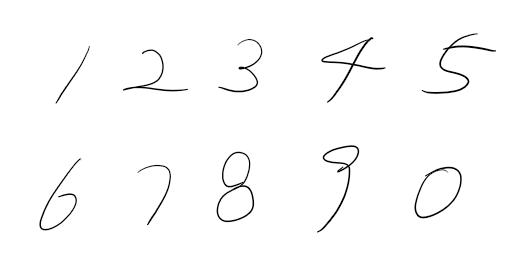

In [7]:
src_image = cv2.imread(path,cv2.IMREAD_COLOR)
cv2_imshow(src_image)

In [10]:
cpy_image = src_image.copy()
gray_image = cv2.cvtColor(cpy_image,cv2.COLOR_BGR2GRAY)
cpy_image.shape , gray_image.shape

((259, 532, 3), (259, 532))

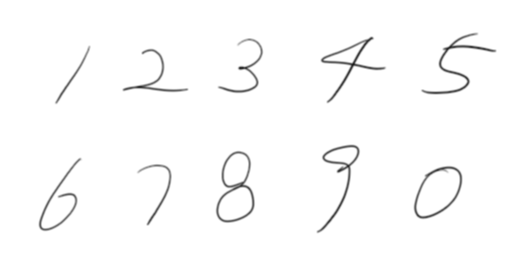

In [12]:
blur_image = cv2.GaussianBlur(gray_image,(3,3),0)
cv2_imshow(blur_image)

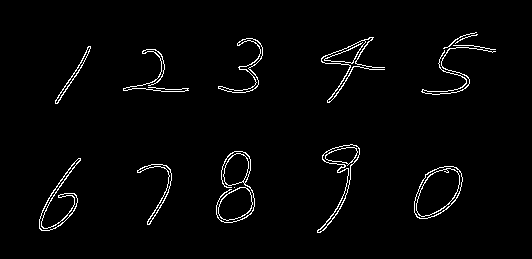

In [13]:
canny_image = cv2.Canny(blur_image,100,200)
cv2_imshow(canny_image)

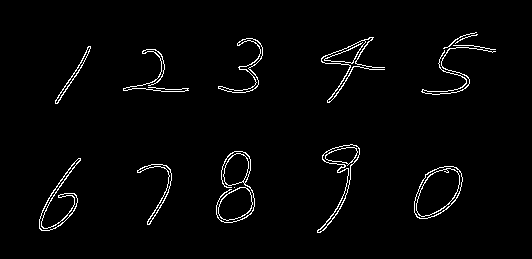

In [14]:
canny_image = cv2.Canny(blur_image,50,180)
cv2_imshow(canny_image)

In [17]:
contours,_=cv2.findContours(canny_image,
                 cv2.RETR_TREE,
                 cv2.CHAIN_APPROX_SIMPLE)
len(contours)

27

In [23]:
store_xywh=[]
for contour in contours:
   x,y,w,h= cv2.boundingRect(contour)
   flag = False  #비슷한 데이터가 없다.
   if(w>=30) and (h>=40):
     for sv in store_xywh:
       gx = abs(sv[0]-x)
       gy = abs(sv[1]-y)
       if(gx<5) and (gy<5):
         flag = True #이미 비슷한 데이터 존재
         break
     if flag == False: #비슷하 것을 발견하지 못함
       store_xywh.append([x,y,w,h])

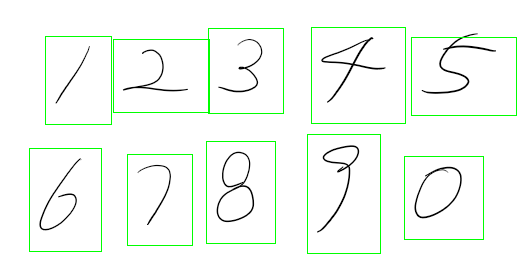

In [26]:
for sv in store_xywh:
  x,y,w,h = sv
  cv2.rectangle(src_image,
     (x-10,y-10),
     (x+w+20,y+h+20),
     (0,255,0),1)
cv2_imshow(src_image)